# Setting up Tensorflow and it's required dependencies

##### References:
https://github.com/nicknochnack/TFODCourse<br/>
https://www.youtube.com/watch?v=yqkISICHH-U&ab_channel=NicholasRenotte<br/>
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md<br/>
https://www.tensorflow.org/install/source_windows<br/>
https://github.com/tensorflow/models/blob/master/research/object_detection/builders/model_builder_tf2_test.py<br/>
https://github.com/tensorflow/models/tree/master/research<br/>

In [ ]:
# May need to run twice
!pip install tensorflow --upgrade

# Use this line if training on GPU
!pip install tensorflow-gpu --upgrade

!pip install matplotlib scipy Pillow pyyaml tensorflow_io
!pip install -U tf-models-official

!pip install pytz
!pip install pandas

!pip install pycocotools-windows
!pip install lvis
!pip install gin-config
!pip install tensorflow-addons
!pip install pycocotools-windows

## 1. Creates Workspace

In [191]:
!python --version

Python 3.10.4


In [2]:
# using Efficient D1 640x640 model
# list of models can be found at: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
import os
# Model info
efficientDetD1 = ['efficientDetD1-12', 'efficientdet_d1_coco17_tpu-32', 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz']
mobilnetv2 = ['mobilnetv2-large', 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8', 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz']
CUSTOM_MODEL_NAME = mobilnetv2[0]  # Folder the model will be saved at
PRETRAINED_MODEL_NAME = mobilnetv2[1] # Actual name of model
PRETRAINED_MODEL_URL = mobilnetv2[2] # Trained model URl

TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
# Creates paths for refering to at a later date.
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'), # High-level workspace: holds annotation and tf records file
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'), 
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'), 
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'), # 
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [195]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [196]:
# List created paths
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\mobilnetv2-large',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\mobilnetv2-large\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\mobilnetv2-large\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\mobilnetv2-large\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc'}

## 2. Download TF Models Pretrained Models From Tensorflow Model Zoo and Install TFOD

In [197]:
if os.name=='nt':
    !pip install wget
    import wget


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
# Clones: https://github.com/tensorflow/models/tree/master/research into Tensorflow/models
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [199]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

# installs protoc (protocol buffers)
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    # Installs object detection API
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack


Obtaining file:///C:/Users/Will/Documents/Python/Shell/code/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [200]:
# verification script can be found at https://github.com/tensorflow/models/blob/master/research/object_detection/builders/model_builder_tf2_test.py
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.4: C:\Users\Will\AppData\Local\Programs\Python\Python310\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-12-01 22:40:37.395206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 22:40:37.727052: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6739 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6
C:\Users\Will\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1109: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  

In [201]:
# Get download pretrained model from tensorflow model-zoo
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

 21% [...............                                                         ]  4308992 / 20518283

 63% [.............................................                           ] 13033472 / 20518283

100% [........................................................................] 20518283 / 20518283

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [202]:
!pip list

Package                       Version     Editable project location
----------------------------- ----------- -------------------------------------------------------------------------
absl-py                       1.0.0
albumentations                1.3.0
anyio                         3.6.2
apache-beam                   2.42.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.8
astunparse                    1.6.3
attrs                         22.1.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
cachetools                    5.1.0
certifi                       2022.5.18.1
cffi                          1.15.1
charset-normalizer            2.0.12
cloudpickle                   2.1.0
colorama                      0.4.5
contextlib2                   21.6.0
contourpy                     1.0.5
crcmod                        1.7
cycler     


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Create Label Map
</br>
Create label map using below labels (must match labels used in labelImg)

In [203]:
labels = [{'name':'turtle', 'id':1}, {'name':'turtle_tracks', 'id':2}]

In [204]:
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 4. Create TF Records
</br>
Creates a file format, which is used to train models

In [205]:
""" 
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}
"""

" \n# OPTIONAL IF RUNNING ON COLAB\nARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')\nif os.path.exists(ARCHIVE_FILES):\n  !tar -zxvf {ARCHIVE_FILES}\n"

In [206]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [207]:
# Verifies label map from Step 3, to current image labels in train/test
# If error, look at named labels in step 3 and named labels from labelImg
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


## 5. Copy Model Config to Training Folder


In [208]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


## 6. Update Config for Transfer Learning
</br>
Configures pretrained model pipeline, with created paths from step 1

In [209]:
import object_detection

In [210]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [211]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [212]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [213]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [214]:
batches = 8
epochs = 16000

In [215]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = batches
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [216]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## 7. Train Model
</br>
Run the following cells below to train model.

In [217]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [218]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], epochs)

In [219]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\mobilnetv2-large --pipeline_config_path=Tensorflow\workspace\models\mobilnetv2-large\pipeline.config --num_train_steps=16000


2022-12-01 22:39:54.601825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 22:39:54.943965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7429 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1201 22:39:55.145503 29112 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 16000
I1201 22:39:55.147495 29112 config_util.py:552] Maybe overwriting train_steps: 16000
INFO:tensorflow:

In [188]:
# To see status while commands run, run the above commands inside command prompt
!{command}

^C


## 8. Evaluate the Model
</br>
To run tensorboard, run the following command:
`tensorboard --logdir=.` </br>
Make sure you are in your `\Tensorflow\workspace\models\{CUSTOM_MODEL_NAME}\train` or `\Tensorflow\workspace\models\{CUSTOM_MODEL_NAME}\eval` directory. 

In [220]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [221]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\mobilnetv2-large --pipeline_config_path=Tensorflow\workspace\models\mobilnetv2-large\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\mobilnetv2-large


In [158]:
!{command}

^C


In [5]:
print('cd {}/eval'.format(paths['CHECKPOINT_PATH']))

cd Tensorflow\workspace\models\mobilnetv2-large/eval


## Load Train Model From Checkpoint
</br>
Allows you to use your model

In [3]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder

CUSTOM_MODEL_NAME = 'mobilnetv2-large'
CHECKPOINT_PATH =  os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME)
PIPELINE_CONFIG = os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config')

In [4]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-18')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## Detect from an Image

In [5]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import os
import random

%matplotlib inline

In [6]:
LABEL_MAP_NAME = 'label_map.pbtxt'
LABEL_MAP = os.path.join('Tensorflow', 'workspace','annotations', LABEL_MAP_NAME)


category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP)

In [7]:
# Path to images
IMAGE_PATH = os.path.join('Tensorflow', 'images', 'test')

imgExtension = ["png", "jpeg", "jpg"] #Image Extensions to be chosen from
allImages = list()

def chooseRandomImage(directory=IMAGE_PATH):
    for img in os.listdir(directory): #Lists all files
        ext = img.split(".")[len(img.split(".")) - 1]
        if (ext in imgExtension):
            allImages.append(img)
    choice = random.randint(0, len(allImages) - 1)
    chosenImage = allImages[choice] #Do Whatever you want with the image file
    return os.path.join(IMAGE_PATH, chosenImage)


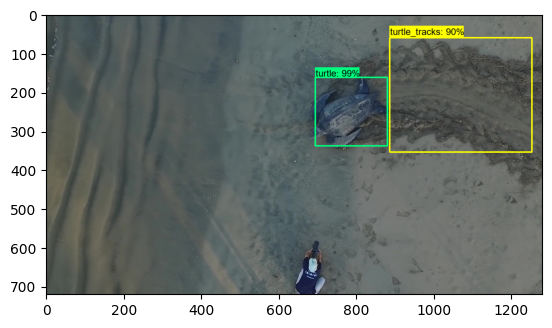

In [24]:
img = chooseRandomImage()
read_img = cv2.imread(img)
image_np = np.array(read_img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=6,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()